# FRA261: Robot Vision: Nail segmentation_Region-based segmentation
member

นายธรรมสรณ์ โรจนอัครพงศ์ 64340500030

## Region-based segmentation

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Process
1. Region Growing Algorithm

     Represents the start of the function. region_growing That will segment the image based on the similarity of adjacent pixel values.

2. Initialize Variables

     Set default variables such as seed point, intensity threshold, and how the image will be segmented. (segmented_img)

3. Main Loop

     Start the main loop to perform inspection and add pixels to the growing region.

4. Check Pixel Validity

     Checks whether the pixel under consideration is within the image boundary.

5. Compare Intensity

     The difference in pixel intensity compared to the average of pixels in the growing region was examined. If this value is within the intensity threshold, then the pixel is added to the region.

6. Update Region

     Improve the regional average by adding new pixels. and prepare pixels to be considered in the next round

7. Return segmented image

     The segmented image is returned when the loop ends.

In [ ]:
def region_growing(img, seed, intensity_threshold):
    if img is None:
        raise ValueError("No image provided")

    if not (0 <= seed[0] < img.shape[0] and 0 <= seed[1] < img.shape[1]):
        raise ValueError("Seed point is outside the image bounds")

    connectivity = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-way connectivity

    segmented_img = np.zeros_like(img, dtype=np.uint8)
    segmented_img[seed] = 255
    pixels = [seed]
    region_size = 1
    region_sum = int(img[seed])

    while pixels:
        new_pixels = []
        for pixel in pixels:
            for dx, dy in connectivity:
                x, y = pixel[0] + dx, pixel[1] + dy
                if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                    if segmented_img[x, y] == 0 and abs(int(img[x, y]) - region_sum / region_size) < intensity_threshold:
                        segmented_img[x, y] = 255
                        region_sum += int(img[x, y])
                        region_size += 1
                        new_pixels.append((x, y))
        pixels = new_pixels

    return segmented_img

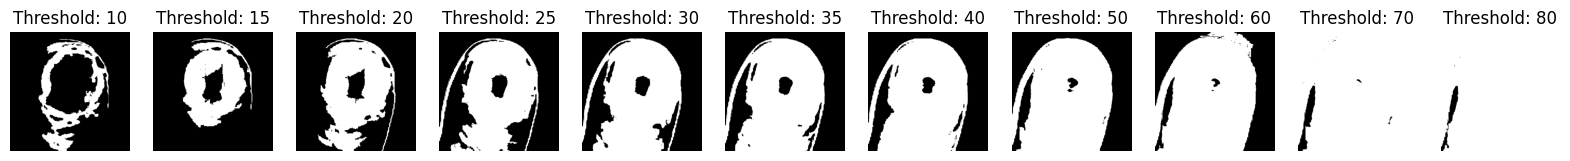

In [ ]:
"""
Create a Loop to find the appropriate threshold value.
Because there is no definite value for which the threshold is appropriate.
Therefore, the image must be plotted along with the threshold value.
"""

IMAGE_PATH = "/content/Image/Screen-Shot-2021-10-26-at-11-18-01-AM_png_jpg.rf.e5cd85dd61a9f09c0a028e2d58c65821.jpg"
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

seed_point = (200, 200)
threshold_values = [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, ]
fig, axs = plt.subplots(1, len(threshold_values), figsize=(20, 4))

for i, threshold in enumerate(threshold_values):
    segmented_image = region_growing(img, seed_point, threshold)
    axs[i].imshow(segmented_image, cmap='gray')
    axs[i].title.set_text(f'Threshold: {threshold}')
    axs[i].axis('off')
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
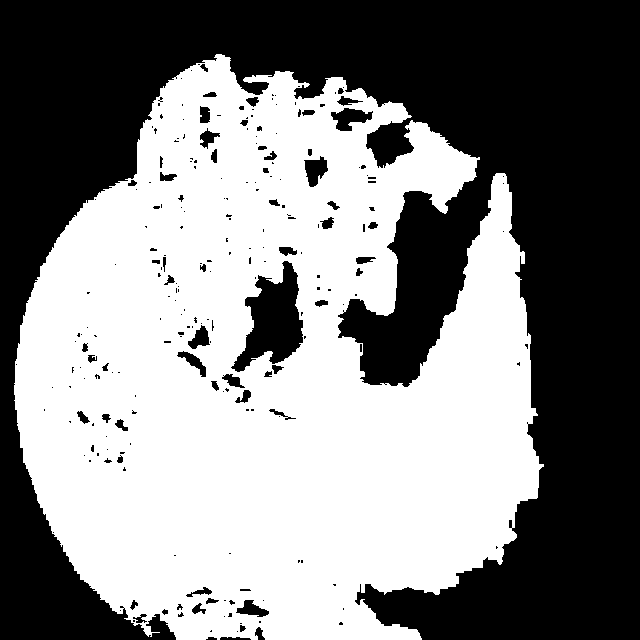

In [ ]:
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE) #convert image to grayscale
seed_point = (200, 200)
intensity_threshold = 30
segmented_image = region_growing(img, seed_point, intensity_threshold)
segmented_image

array([[[ 53,  35,  33],
        [ 53,  35,  33],
        [ 54,  36,  34],
        ...,
        [ 59,  57,  58],
        [ 59,  57,  58],
        [ 59,  57,  58]],

       [[ 52,  34,  32],
        [ 53,  35,  33],
        [ 53,  35,  33],
        ...,
        [ 59,  57,  58],
        [ 59,  57,  58],
        [ 59,  57,  58]],

       [[ 51,  33,  31],
        [ 51,  33,  31],
        [ 52,  34,  32],
        ...,
        [ 59,  57,  58],
        [ 59,  57,  58],
        [ 59,  57,  58]],

       ...,

       [[164, 149, 146],
        [166, 151, 148],
        [150, 135, 132],
        ...,
        [123, 106,  99],
        [123, 106,  99],
        [123, 106,  99]],

       [[164, 149, 146],
        [167, 152, 149],
        [151, 136, 133],
        ...,
        [121, 106,  99],
        [121, 106,  99],
        [121, 106,  99]],

       [[164, 149, 146],
        [167, 152, 149],
        [151, 136, 133],
        ...,
        [121, 106,  99],
        [121, 106,  99],
        [121, 106,  99]]], dtype=uint8)
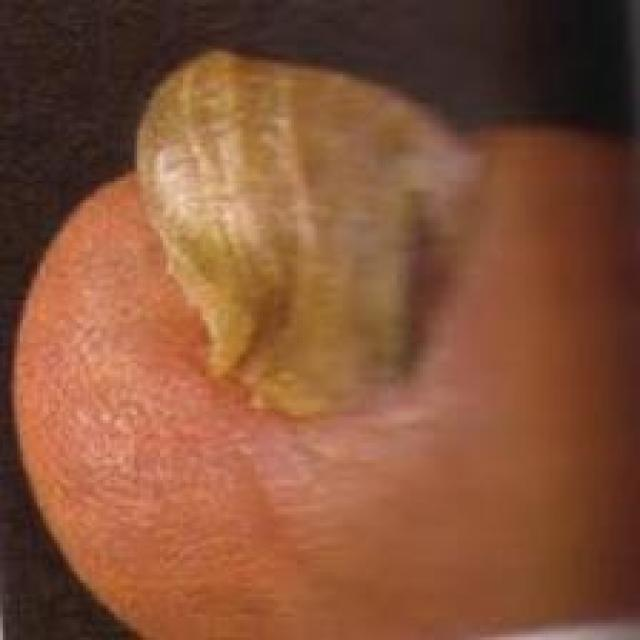

In [ ]:
original_image = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) #convert to original image(RGB)
RGB_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
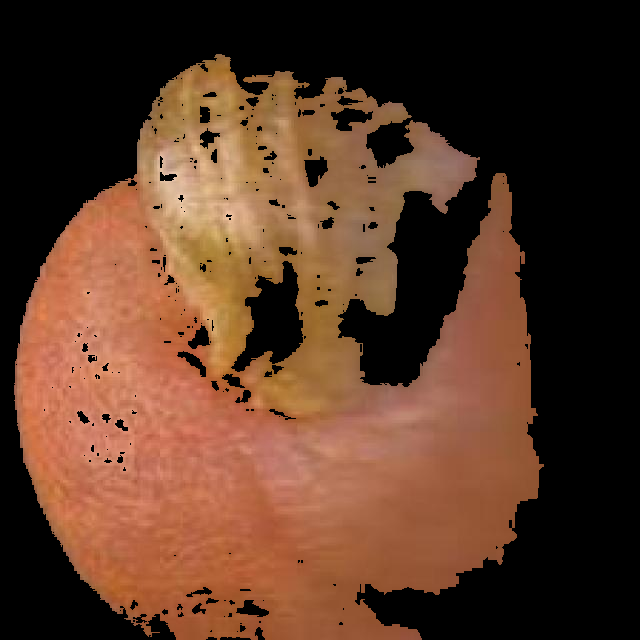

In [ ]:
"""
Create a true mask for pixels with value 255.
Create an array to store the resulting images. which is an empty picture
In order to replace the image that has passed through the mask to create the output image.
"""
mask = segmented_image == 255
segmented_result = np.zeros_like(RGB_img)
segmented_result[mask] = RGB_img[mask]
segmented_result

array([[[ 53,  35,  33],
        [ 53,  35,  33],
        [ 54,  36,  34],
        ...,
        [ 59,  57,  58],
        [ 59,  57,  58],
        [ 59,  57,  58]],

       [[ 52,  34,  32],
        [ 53,  35,  33],
        [ 53,  35,  33],
        ...,
        [ 59,  57,  58],
        [ 59,  57,  58],
        [ 59,  57,  58]],

       [[ 51,  33,  31],
        [ 51,  33,  31],
        [ 52,  34,  32],
        ...,
        [ 59,  57,  58],
        [ 59,  57,  58],
        [ 59,  57,  58]],

       ...,

       [[164, 149, 146],
        [166, 151, 148],
        [150, 135, 132],
        ...,
        [123, 106,  99],
        [123, 106,  99],
        [123, 106,  99]],

       [[164, 149, 146],
        [167, 152, 149],
        [151, 136, 133],
        ...,
        [121, 106,  99],
        [121, 106,  99],
        [121, 106,  99]],

       [[164, 149, 146],
        [167, 152, 149],
        [151, 136, 133],
        ...,
        [121, 106,  99],
        [121, 106,  99],
        [121, 106,  99]]], dtype=uint8)
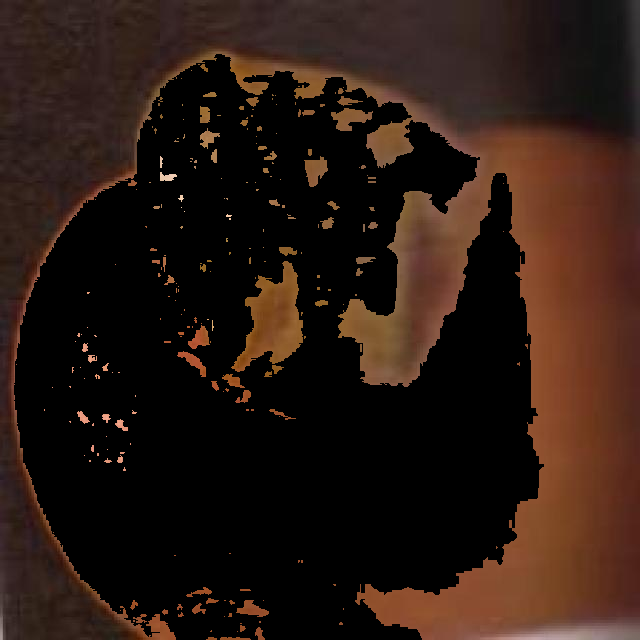

In [ ]:
"""
Create a false mask for pixels with value 255.
Create an array to store the resulting images. which is an empty picture
In order to replace the image that has passed through the mask to create the output image.
"""
mask = segmented_image != 255
segmented_result = np.zeros_like(RGB_img)
segmented_result[mask] = RGB_img[mask]
segmented_result

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import os
import glob
import shutil

1. Reading Images: The code starts by looping through every image file in the specified folder. (source_folder) and read into black and white (grayscale) format, which is suitable for image segmentation processing.
2. Check Image: If the image cannot be loaded (is None), it will skip to the next file without any further processing.
3. Defining Seed Point and Intensity Threshold: Specify the starting point for the region growth process and the pixel intensity threshold value that will be used to decide which pixels will be added to the growing region.
4. Region Growing Algorithm: Use region_growing function. To create a segmented image from a black and white image with a specified threshold value, create a mask from this segmented image that will be used to create the resulting image.
5. Loading original images: Load original images in color mode for use in generating colored result images.
6. Creating masks for segmented and non-segmented segments: Use the segmentation results to create masks for segmented segments (== 255) and non-segmented segments (!= 255).
7. Saving results: Create two images from the generated mask—the segmented image and the remaining (inverted) image—and save these images in the specified folder.
8. Display: Prints a message indicating where the file is saved in the folder.

In [ ]:
for file_path in glob.glob(os.path.join(source_folder, '*.jpg')):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image: {file_path}")
        continue

    seed_point = (200, 200)  # Adjust as necessary
    intensity_threshold = 25  # Adjust as necessary
    segmented_img = region_growing(img, seed_point, intensity_threshold)

    original_image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if original_image is None:
        print(f"Failed to load original image for coloring: {file_path}")
        continue

    RGB_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    mask = segmented_img == 255
    inverted_mask = segmented_img != 255

    segmented_result = np.zeros_like(RGB_img)
    inverted_result = np.zeros_like(RGB_img)

    segmented_result[mask] = RGB_img[mask]
    inverted_result[inverted_mask] = RGB_img[inverted_mask]

    base_name = os.path.basename(file_path)
    output_path_segmented = os.path.join(segmented_folder, f"segmented_{base_name}")
    output_path_inverted = os.path.join(segmented_folder, f"inverted_{base_name}")

    cv2.imwrite(output_path_segmented, cv2.cvtColor(segmented_result, cv2.COLOR_RGB2BGR))
    cv2.imwrite(output_path_inverted, cv2.cvtColor(inverted_result, cv2.COLOR_RGB2BGR))

    print(f"Segmented image saved to: {output_path_segmented}")
    print(f"Inverted image saved to: {output_path_inverted}")

print("Segmentation and saving complete.")

Segmentation and saving complete.
